<a href="https://colab.research.google.com/github/HaruEikyou/EikyouHaru/blob/master/image_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
!wget https://raw.githubusercontent.com/HaruEikyou/EikyouHaru/master/Tugas4/logo.png --no-check-certificate

--2021-11-09 06:55:34--  https://raw.githubusercontent.com/HaruEikyou/EikyouHaru/master/Tugas4/logo.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47346 (46K) [image/png]
Saving to: ‘logo.png.5’

logo.png.5          100%[===================>]  46.24K  --.-KB/s    in 0.01s   

2021-11-09 06:55:34 (4.39 MB/s) - ‘logo.png.5’ saved [47346/47346]



In [134]:
from matplotlib import pyplot as plt
import numpy as np
import argparse
import cv2
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()



In [137]:
args = {
	"image": "logo.png.5"
}


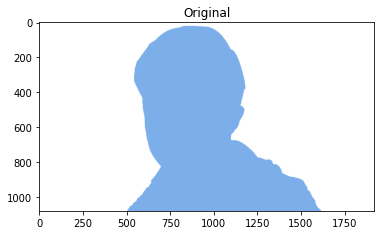

Dimensi Image adalah sebesar:  (1080, 1920, 3)


True

In [138]:
# 1. Read and Write image

image = cv2.imread(args["image"])
plt_imshow("Original", image)
# Show Image Dimension
print("Dimensi Image adalah sebesar: ", image.shape)
# menyimpan image
cv2.imwrite("wheel.png", im_crop)

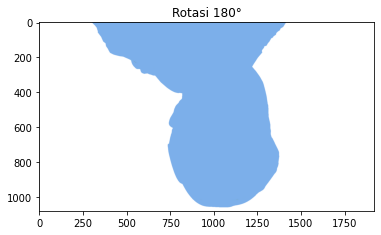

In [139]:
# 2. Rotation Image
(h, w) = image.shape[:2]
center = (w/2, h/2)

M = cv2.getRotationMatrix2D(center, 180, 1.0)
rotated = cv2.warpAffine(image, M, (w,h))
plt_imshow("Rotasi 180°", rotated)

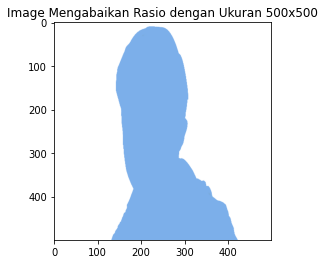

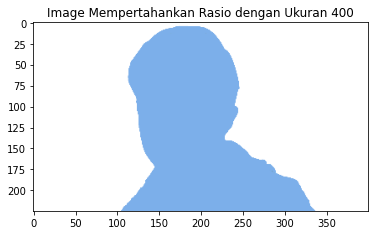

In [140]:
# 3. Resize Image 
#(Ignore Aspect Ratio)
im_resized = cv2.resize(image, (500,500))
print()
plt_imshow("Image Mengabaikan Rasio dengan Ukuran 500x500", im_resized)

# With Aspect Ratio
r = 400/image.shape[1]
dim = (400,int(image.shape[0]*r))
im_resized_with_ration = cv2.resize(image, dim)
print("")
plt_imshow("Image Mempertahankan Rasio dengan Ukuran 400", im_resized_with_ration)

[INFO] Membalikkan Image secara Horizontal dan Vertikal...


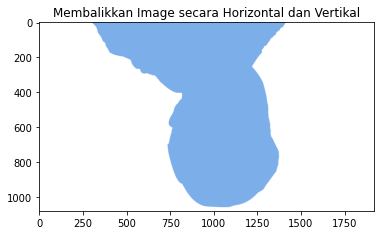

In [141]:
# 4. Flipping Image 
 
#flip the image along both axes
flipped = cv2.flip(image, -1)
print("[INFO] Membalikkan Image secara Horizontal dan Vertikal...")
plt_imshow("Membalikkan Image secara Horizontal dan Vertikal", flipped)

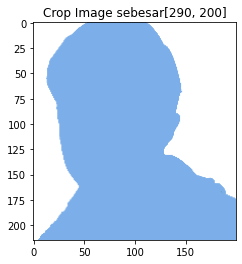

(215, 200, 3)


In [142]:
# 5. Cropping image
im_crop = im_resized_with_ration[10:300, 100:300]
plt_imshow("Crop Image sebesar[290, 200]", im_crop)
print(im_crop.shape)

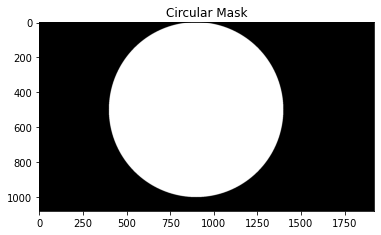

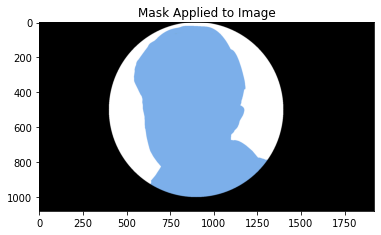

In [153]:
# 6. Masking Image
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.circle(mask, (900, 500), 500, 255, -1)
masked = cv2.bitwise_and(image, image, mask=mask)

# show the output images
plt_imshow("Circular Mask", mask)
plt_imshow("Mask Applied to Image", masked)

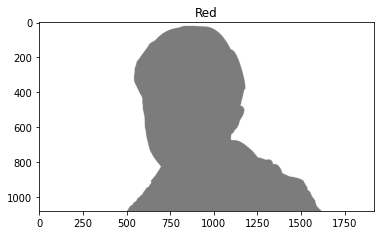

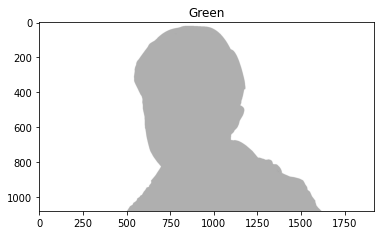

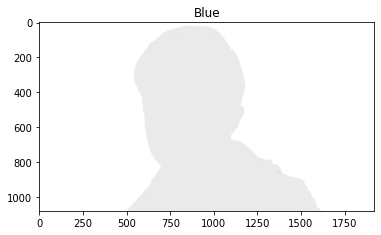

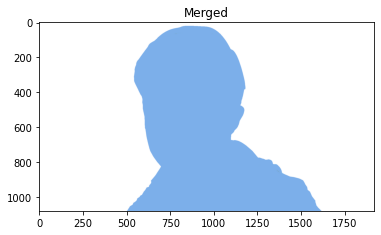

Visualisasi Masing-Masing Warna: 


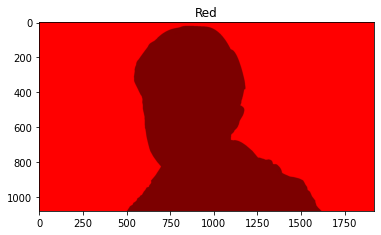

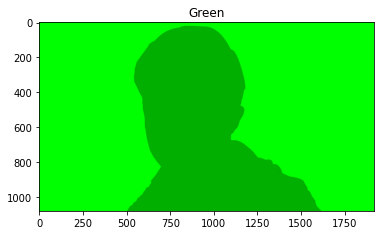

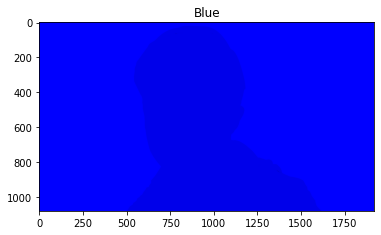

In [154]:
# 7. Splitting and Merging Channel
(B, G, R) = cv2.split(image)

# show each channel individually
plt_imshow("Red", R)
plt_imshow("Green", G)
plt_imshow("Blue", B)

merged = cv2.merge([B, G, R])
plt_imshow("Merged", merged)

print("Visualisasi Masing-Masing Warna: ")
zeros = np.zeros(image.shape[:2], dtype="uint8")
plt_imshow("Red", cv2.merge([zeros, zeros, R]))
plt_imshow("Green", cv2.merge([zeros, G, zeros]))
plt_imshow("Blue", cv2.merge([B, zeros, zeros]))